In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("SpamClassifier-master/smsspamcollection/SMSSpamCollection", sep="\t", names=["label", "message"])

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
(df['label'].value_counts() / len(df)) * 100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

<Axes: xlabel='label', ylabel='count'>

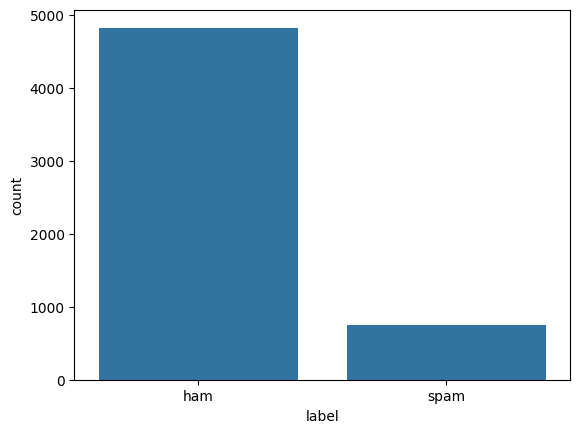

In [7]:
sns.countplot(x="label", data=df)

In [ ]:
def preprocess_text(document):
    # Remove punctuation
    document = document.translate(str.maketrans('', '', string.punctuation))
    regex = re.compile(r'\d+')
    document = regex.sub('', document)
    
    # Tokenize
    tokenizer = nltk.tokenize.PunktTokenizer()
    tokens = tokenizer.tokenize(document)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Return string
    return " ".join(tokens)


In [15]:
X = df['message']
y = df['label']


In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=5000, preprocessor=preprocess_text, lowercase=True, norm='l2')

In [21]:
X_vectorized = vectorizer.fit_transform(X)
X_vectorized = X_vectorized.toarray()

In [18]:
map = {"ham": 0, "spam": 1}
y = df['label'].map(map)

In [24]:
max(X_vectorized[0])

0.3919713976570161

In [25]:
X_vectorized[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer


In [27]:
model = BernoulliNB()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
model.fit(X_train, y_train)

BernoulliNB()

In [30]:
model.score(X_test, y_test)

0.9605381165919282

In [31]:
# Find the most informative features
def get_most_informative_features(vectorizer, model, n=10):
    feature_names = vectorizer.get_feature_names_out()
    class_labels = model.classes_
    coefs = model.feature_log_prob_
    top_features = {}
    
    for i, class_label in enumerate(class_labels):
        top_n_indices = np.argsort(coefs[i])[-n:]
        top_n_features = feature_names[top_n_indices]
        top_features[class_label] = top_n_features
    
    return top_features

In [33]:
get_most_informative_features(vectorizer, model, n=10)

{0: array(['ur', 'dont', 'day', 'just', 'like', 'come', 'got', 'know', 'ltgt',
        'Im'], dtype=object),
 1: array(['Txt', 'Your', 'txt', 'You', 'To', 'claim', 'FREE', 'ur', 'mobile',
        'Call'], dtype=object)}

In [34]:
# Print the confusion matrix
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[962   4]
 [ 40 109]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.96      0.73      0.83       149

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

